In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


mataura pf
opuwo na
upernavik gl
hailey us
bredasdorp za
busselton au
zhangjiakou cn
caracoli co
karabash ru
carnarvon au
ancud cl
arraial do cabo br
constitucion mx
mys shmidta ru
shache cn
mar del plata ar
barentsburg sj
nanortalik gl
basoko cd
vaini to
kapit my
butaritari ki
talnakh ru
provideniya ru
sao filipe cv
upernavik gl
cape town za
port elizabeth za
port lincoln au
butaritari ki
cabo san lucas mx
ribeira grande pt
mataura pf
rikitea pf
albany au
vaini to
callaguip ph
atuona pf
avarua ck
ushuaia ar
barentsburg sj
huejuquilla el alto mx
kapaa us
avarua ck
port alfred za
avarua ck
vaini to
tuktoyaktuk ca
tuktoyaktuk ca
yellowknife ca
tuktoyaktuk ca
mataura pf
new norfolk au
ilovlya ru
kudahuvadhoo mv
esperance au
inta ru
tocopilla cl
puerto ayora ec
kalikino ru
hithadhoo mv
chiusi it
luau ao
carnarvon au
mecca sa
dikson ru
jamestown sh
katsuura jp
east london za
new norfolk au
dhar in
mataura pf
pampierstad za
vaini to
tilichiki ru
bud no
vila franca do campo pt
bluff nz
saint 

albany au
cascais pt
tonantins br
progreso mx
morro bay us
mataura pf
atuona pf
punta arenas cl
kashan ir
bilibino ru
cabedelo br
qaanaaq gl
menongue ao
bar harbor us
busselton au
hermanus za
meulaboh id
butaritari ki
bluff nz
albany au
bengkulu id
rikitea pf
albany au
rikitea pf
nikolskoye ru
denton us
khatanga ru
nizhneyansk ru
chokurdakh ru
vao nc
tuktoyaktuk ca
namibe ao
ondjiva ao
santa isabel us
la ronge ca
nizhneyansk ru
iskateley ru
singaraja id
punta arenas cl
mataura pf
carnarvon au
puerto ayora ec
hasaki jp
busselton au
albany au
katsuura jp
tsihombe mg
wad madani sd
airai pw
las margaritas mx
praia da vitoria pt
ushuaia ar
aleppo sy
rio gallegos ar
bluff nz
karambakkudi in
torbay ca
tumannyy ru
hobart au
ondjiva ao
new norfolk au
mount isa au
kadykchan ru
grand centre ca
hermanus za
okhotsk ru
mataura pf
hofn is
sentyabrskiy ru
taolanaro mg
kichera ru
okhotsk ru
castro cl
jamestown sh
chuy uy
marsa matruh eg
lydenburg za
lompoc us
young au
gunjur gm
maceio br
ushuaia ar
hob

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9c4a366a7fe83b9a912375f1a604eca


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b9c4a366a7fe83b9a912375f1a604eca&q=Boston


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | mataura
Processing Record 2 of Set 13 | opuwo
Processing Record 3 of Set 13 | upernavik
Processing Record 4 of Set 13 | hailey
Processing Record 5 of Set 13 | bredasdorp
Processing Record 6 of Set 13 | busselton
Processing Record 7 of Set 13 | zhangjiakou
Processing Record 8 of Set 13 | caracoli
Processing Record 9 of Set 13 | karabash
Processing Record 10 of Set 13 | carnarvon
Processing Record 11 of Set 13 | ancud
Processing Record 12 of Set 13 | arraial do cabo
Processing Record 13 of Set 13 | constitucion
Processing Record 14 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 13 | shache
Processing Record 16 of Set 13 | mar del plata
Processing Record 17 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 13 | nanortalik
Processing Record 19 of Set 13 | basoko
Processing Record 20 of Set 13 | vaini
Processing Record 21 of Set 13 | kapi

Processing Record 36 of Set 16 | awbari
Processing Record 37 of Set 16 | acajutla
Processing Record 38 of Set 16 | savonlinna
Processing Record 39 of Set 16 | stornoway
Processing Record 40 of Set 16 | puerto del rosario
Processing Record 41 of Set 16 | port hedland
Processing Record 42 of Set 16 | ponta delgada
Processing Record 43 of Set 16 | mayo
Processing Record 44 of Set 16 | kaduqli
Processing Record 45 of Set 16 | coahuayana
Processing Record 46 of Set 16 | san patricio
Processing Record 47 of Set 16 | lazarev
Processing Record 48 of Set 16 | soyo
Processing Record 49 of Set 16 | nikolskoye
Processing Record 50 of Set 16 | yenagoa
Processing Record 1 of Set 17 | nosy varika
Processing Record 2 of Set 17 | howard springs
Processing Record 3 of Set 17 | klyuchi
Processing Record 4 of Set 17 | wanaka
Processing Record 5 of Set 17 | khanpur
Processing Record 6 of Set 17 | babanusah
City not found. Skipping...
Processing Record 7 of Set 17 | tidore
City not found. Skipping...
Proces

Processing Record 23 of Set 20 | dhidhdhoo
Processing Record 24 of Set 20 | bathsheba
Processing Record 25 of Set 20 | naze
Processing Record 26 of Set 20 | iralaya
Processing Record 27 of Set 20 | zabol
Processing Record 28 of Set 20 | cape coast
Processing Record 29 of Set 20 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 30 of Set 20 | cabedelo
Processing Record 31 of Set 20 | melendugno
Processing Record 32 of Set 20 | general roca
Processing Record 33 of Set 20 | namatanai
Processing Record 34 of Set 20 | cozumel
Processing Record 35 of Set 20 | amot
Processing Record 36 of Set 20 | wukari
Processing Record 37 of Set 20 | baoma
Processing Record 38 of Set 20 | brigantine
Processing Record 39 of Set 20 | halalo
City not found. Skipping...
Processing Record 40 of Set 20 | angostura
Processing Record 41 of Set 20 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 20 | havoysund
Processing Record 43 of Set 20 | lolua
City not found. Skipping...


Processing Record 9 of Set 24 | pangnirtung
Processing Record 10 of Set 24 | portland
Processing Record 11 of Set 24 | umm lajj
Processing Record 12 of Set 24 | berezovyy
Processing Record 13 of Set 24 | hamilton
Processing Record 14 of Set 24 | alice
Processing Record 15 of Set 24 | tay ninh
Processing Record 16 of Set 24 | oktyabrskiy
Processing Record 17 of Set 24 | praia
Processing Record 18 of Set 24 | eyl
Processing Record 19 of Set 24 | nansio
Processing Record 20 of Set 24 | zhitikara
City not found. Skipping...
Processing Record 21 of Set 24 | lavrentiya
Processing Record 22 of Set 24 | bergerac
Processing Record 23 of Set 24 | goma
Processing Record 24 of Set 24 | san isidro
Processing Record 25 of Set 24 | dakar
Processing Record 26 of Set 24 | montijo
Processing Record 27 of Set 24 | neya
Processing Record 28 of Set 24 | kyshtovka
Processing Record 29 of Set 24 | loa janan
Processing Record 30 of Set 24 | adrar
Processing Record 31 of Set 24 | yumen
Processing Record 32 of 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,40.59,93,48,0.94,NZ,2020-05-28 18:46:08
1,Opuwo,-18.06,13.84,62.91,41,0,5.21,NA,2020-05-28 18:52:21
2,Upernavik,72.79,-56.15,29.59,96,66,4.29,GL,2020-05-28 18:46:17
3,Hailey,43.52,-114.32,69.80,43,5,9.17,US,2020-05-28 18:52:21
4,Bredasdorp,-34.53,20.04,62.60,67,100,16.11,ZA,2020-05-28 18:44:55
5,Busselton,-33.65,115.33,61.00,71,11,20.29,AU,2020-05-28 18:46:09
6,Zhangjiakou,40.81,114.88,68.47,26,95,5.39,CN,2020-05-28 18:52:21
7,Caracoli,6.41,-74.76,76.23,87,100,2.26,CO,2020-05-28 18:52:22
8,Karabash,55.48,60.22,50.90,90,0,4.90,RU,2020-05-28 18:52:22
9,Carnarvon,-24.87,113.63,64.60,64,0,11.34,AU,2020-05-28 18:46:26


In [12]:
#Reorder the column
new_column_order = ["City", 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-05-28 18:46:08,-46.19,168.86,40.59,93,48,0.94
1,Opuwo,NA,2020-05-28 18:52:21,-18.06,13.84,62.91,41,0,5.21
2,Upernavik,GL,2020-05-28 18:46:17,72.79,-56.15,29.59,96,66,4.29
3,Hailey,US,2020-05-28 18:52:21,43.52,-114.32,69.80,43,5,9.17
4,Bredasdorp,ZA,2020-05-28 18:44:55,-34.53,20.04,62.60,67,100,16.11
5,Busselton,AU,2020-05-28 18:46:09,-33.65,115.33,61.00,71,11,20.29
6,Zhangjiakou,CN,2020-05-28 18:52:21,40.81,114.88,68.47,26,95,5.39
7,Caracoli,CO,2020-05-28 18:52:22,6.41,-74.76,76.23,87,100,2.26
8,Karabash,RU,2020-05-28 18:52:22,55.48,60.22,50.90,90,0,4.90
9,Carnarvon,AU,2020-05-28 18:46:26,-24.87,113.63,64.60,64,0,11.34


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'05/28/20'

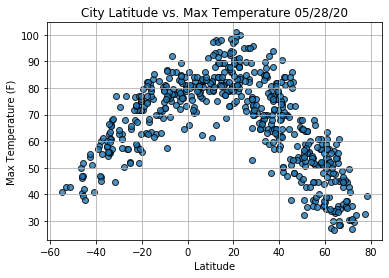

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

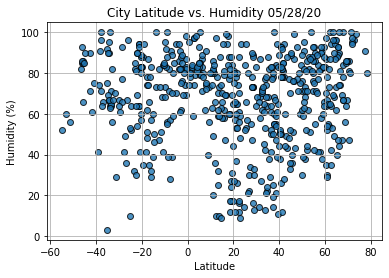

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()